In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

OVERWRITE_DATAFRAMES = True

Finished running cellPLATO initialization and loaded config.
Initializing:  ThreeConditions_Go_Stopping_Stopped_1-12-2023
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  D:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped_1-12-2023_OUTPUT/ThreeConditions_Go_Stopping_Stopped_1-12-2023\2023-01-12_11-14-19-240330\plots/
Using unique embedding per dataset shortname:  ThreeConditions_Go_Stopping_Stopped_1-12-2023
Exporting static Superplots
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Exporting SNS Bar plots
Using corresponding CTL_SHORTLABEL:  Untreated  for condition:  Condition_Migrating
Dataset in current notebook:  ThreeConditions_Go_Stopping_Stopped_1-12-2023
Finished initializing data_processing
Finished intializing visualizations
Finished initializing cellPLATO


In [2]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)

,Condition,Experiment,Replicate_ID,Condition_shortlabel,Replicate_shortlabel
0,Condition_Migrating,PBMCeNK_untreated_1__tracks,PBMCeNK_untreated_1__tracks,Untreated,Untreated_0
1,Condition_Slowing,PBMCeNK_CytoD_1_tracks,PBMCeNK_CytoD_1_tracks,CytoD 0.5 uM,CytoD 0.5 uM_0
2,Condition_Stopped,PBMCeNK_CytoD_2_tracks,PBMCeNK_CytoD_2_tracks,CytoD 2 uM,CytoD 2 uM_0


In [ ]:
if os.path.exists(cp.SAVED_DATA_PATH + 'dr_df.csv'):
    print(cp.SAVED_DATA_PATH + 'dr_df_.csv',' exists, loading dataframes...')
    
    # Load existing (preprocessed) data
    comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
    exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')
    dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')
    lab_tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv')
    tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_dr_df.csv')
    tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

else:
    print ("These DFs don't exist yet")

# Measure shape and motion metrics

In [ ]:
# Load, process and combine the dataframes (including segmentation and migration calculations)
comb_df = cp.combine_dataframes(exp_list)

comb_df = cp.measurement_pipeline(comb_df)

# Returns a filtered dataframe, while also adding included column to comb_df
comb_df, filt_counts = cp.apply_filters(comb_df)

# Process a time-averaged DataFrame
tavg_df = cp.time_average(comb_df)

In [ ]:
# factor = 'rip_L'
# cp.time_superplot(comb_df, factor)

In [ ]:
OVERWRITE_DATAFRAMES = True


if OVERWRITE_DATAFRAMES:
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv', index=False)
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv', index=False)


In [ ]:
comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')

# Dimensionality reduction (3D UMAP)

### Perform correlation analysis to understand which factors correlate to one another

In [ ]:
df_in = comb_df
cp.correlation_matrix_heatmap(df_in)

### Variance thresholder to decide on input factors for dimensionality reduction

In [ ]:
OKDR_FACTORS = cp.variance_threshold(comb_df, threshold_value=0.03)

new_DR_FACTORS = OKDR_FACTORS

### Based on correlations and variance thresholder, choose variables to be used to calculate UMAP

In [6]:
# Cut based on high correlation with another = hc
# Cut based on variance thresholder = # vt

DR_FACTORS = ['area',

            # 'bbox_area', # hc
            'eccentricity',
            'equivalent_diameter',
            # 'extent',  # vt
            # 'filled_area', # hc
            'major_axis_length',
            'minor_axis_length',
            'orientation',
            'perimeter',
            # 'solidity',  # vt
            'cumulative_length',
           'euclidean_dist',
            'speed',
            # 'orientedness',  # vt
            'directedness',
            'turn_angle',
            # 'endpoint_dir_ratio',  # vt
            'dir_autocorr',
            # 'outreach_ratio',  # vt
            'MSD', # hc
            # 'max_dist', # hc
            'glob_turn_deg',
            'arrest_coefficient',
            'aspect',
            'rip_L']

In [ ]:
# Does PCA, UMAP, tSNE and outputs the dr_df containing those columns

tsne_perp=150
umap_nn = 30#60
min_dist = 0.0 #0.15 
n_components = 3

altdr_df = cp.dr_pipeline_multiUMAPandTSNE(comb_df, 
                    dr_factors=DR_FACTORS,# new_DR_FACTORS # DR_FACTORS
                    n_components = n_components,
                    umap_nn=umap_nn,
                    min_dist=min_dist) 

In [ ]:
dr_df=altdr_df
df=altdr_df #lab_tavg_dr_df #lab_dr_df
# cp.plot_3D_UMAP(df)
cp.plot_3D_UMAP(df,colorby = 'Condition_shortlabel', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAP')

In [ ]:
# Make tavg_dr_df

tsne_perp=150
umap_nn = 50#60
min_dist = 0.0 #0.15 
n_components = 3

tavg_dr_df = cp.dr_pipeline_multiUMAPandTSNE(tavg_df, 
                    dr_factors=DR_FACTORS,# new_DR_FACTORS # DR_FACTORS
                    n_components = n_components,
                    umap_nn=umap_nn,
                    min_dist=min_dist) 

In [ ]:
df=tavg_dr_df #lab_tavg_dr_df #lab_dr_df
# cp.plot_3D_UMAP(df)
cp.plot_3D_UMAP(df,colorby = 'Condition_shortlabel', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAP')

In [ ]:
OVERWRITE_DATAFRAMES = True


if OVERWRITE_DATAFRAMES:
    tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_dr_df.csv', index=False)
    dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df.csv', index=False)


### Output regular plots

In [ ]:
#Minimal pipelines:

cp.comparative_visualization_pipeline(dr_df)

# Cluster analysis (HDBSCAN of 3D UMAP)

In [ ]:
dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
tavg_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_dr_df.csv')

In [ ]:
# lab_dr_df, exemplars=cp.hdbscan_clustering__DEV_DEV(dr_df, min_cluster_size=800,min_samples=400,cluster_by='UMAPNDIM',  metric='manhattan', plot=False) # This one happens with scaling in there again.
# lab_dr_df, exemplar_df=cp.hdbscan_clustering(dr_df, min_cluster_size=200,min_samples=100,cluster_by='UMAPNDIM',  metric='euclidean', plot=False) # This one happens with scaling in there again. # compare euclidean with CityBlock
lab_dr_df, exemplar_df=cp.hdbscan_clustering(dr_df, min_cluster_size=300,min_samples=200,cluster_by='UMAPNDIM',  metric='euclidean', plot=False) # This one happens with scaling in there again. # compare euclidean with CityBlock

In [ ]:
df=lab_dr_df #lab_tavg_dr_df #lab_dr_df
# cp.plot_3D_UMAP(df)
cp.plot_3D_UMAP(df,colorby = 'label', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAP')

In [ ]:
# lab_tavg_dr_df, tavg_exemplar_df=cp.hdbscan_clustering(tavg_dr_df, min_cluster_size=100,min_samples=50,cluster_by='UMAPNDIM',  metric='euclidean', plot=False,)
lab_tavg_dr_df, tavg_exemplar_df=cp.hdbscan_clustering(tavg_dr_df, min_cluster_size=5,min_samples=5,cluster_by='UMAPNDIM',  metric='euclidean', plot=False,)

In [ ]:
df=lab_tavg_dr_df #lab_tavg_dr_df #lab_dr_df
# cp.plot_3D_UMAP(df)
cp.plot_3D_UMAP(df,colorby = 'label', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAP')

In [ ]:
#Run this function to put the labels into the lab_tavg_lab_dr_df. Slow function. Can potentially be sped up with groupby.

lab_tavg_lab_dr_df=cp.add_tavglabel_todf(lab_dr_df, lab_tavg_dr_df)

In [ ]:
OVERWRITE_DATAFRAMES = True


if OVERWRITE_DATAFRAMES:
    # lab_tavg_lab_dr_df
    lab_tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv')
    lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')
    lab_tavg_lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df.csv')
    exemplar_df.to_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')
    tavg_exemplar_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_exemplar_df.csv')
    # tavg_exemplars.to_csv(cp.SAVED_DATA_PATH + 'tavg_exemplars.csv')
    # exemplars.to_csv(cp.SAVED_DATA_PATH + 'exemplars.csv')
    

    

# Cluster counting - how many cells per cluster ID?

In [ ]:
lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')



In [ ]:
df=lab_dr_df 
lab_count_df = cp.get_label_counts(df, per_rep=False)


In [ ]:
cp.plot_label_counts(lab_count_df)

In [ ]:
df=lab_dr_df #lab_tavg_dr_df #lab_dr_df
# cp.plot_3D_UMAP(df)
cp.plot_3D_UMAP(df,colorby = 'label', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAP')

In [ ]:
# # MAke an alternative 3D plot that you can save here

# import matplotlib.pyplot as plt
# import numpy as np

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# x='UMAP1'
# y='UMAP2'
# z='UMAP3'

# ax.scatter(x,y,z)


# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()

# Quantify plasticity

## Count cluster changes, plot as line plots, box plots also count time in cluster

In [ ]:
lab_tavg_lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df.csv')
# sum_labels = pd.read_csv(cp.SAVED_DATA_PATH + 'sum_labels.csv')
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

In [ ]:
# Count the cluster changes and number of labels
tptlabel_dr_df = cp.count_cluster_changes_with_tavg(lab_tavg_lab_dr_df)
# sum_labels, tptlabel_dr_df = cp.count_cluster_changes(lab_tavg_lab_dr_df)

In [ ]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    # ultimate DF with all of the things you want in it
    
    tptlabel_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
    # sum_labels.to_csv(cp.SAVED_DATA_PATH + 'sum_labels.csv')

In [ ]:
tptlabel_dr_df

In [ ]:
df=tptlabel_dr_df
# all='\_allcells'
cp.plot_plasticity_changes(df, identifier='\_allcells')

In [ ]:
df=tptlabel_dr_df
cp.plot_plasticity_countplots(df, identifier='_allcells')

### TIme in cluster - how much time do cells spend in clusters?

In [ ]:
timeinclus_df=cp.count_time_in_label(tptlabel_dr_df)

In [ ]:
tptlabel_dr_df['Condition']

## Exemplars: Find Example Cells that mark clusters

### EXEMPLAR DF TO DUMMY DF IN CASE THERE IS NOT AN EXEMPLAR FOR EVERY CLUSTER

In [ ]:
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

In [ ]:


df = tptlabel_dr_df
exemp_df = exemplar_df

cp.exemplar_df_check(df, exemp_df)

In [ ]:
# Make an exemplars DF that only contains 5 of each thing
n=3
exemplar_df = exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

In [ ]:
df=exemplar_df #lab_tavg_dr_df #lab_dr_df
# cp.plot_3D_UMAP(df)
cp.plot_3D_UMAP(df,colorby = 'label', symbolby = 'Condition_shortlabel', what = ' OnlyTheExemplars')

# Cluster Disambiguation

### both disambiguate_timepoint() and disambiguate_tavg()

In [4]:
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

### Visualizations of cells that represent each cluster with top contributing metrics

In [ ]:
# Make an exemplars DF that only contains 5 of each thing
n=3
exemplar_df = exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

In [ ]:
# Make an exemplars DF that only contains 5 of each thing
n=3
tavg_exemplar_df = tavg_exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

In [ ]:
size=150

df= tptlabel_dr_df #from the all analysis part
exemp_df=tavg_exemplar_df #from the cluster analysis part.

top_dictionary=cp.contribution_to_clusters_topdictionary(df_in=lab_tavg_dr_df,  howmanyfactors=6) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 

wholetrack_exemplar_df=cp.disambiguate_tavg(df, exemp_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True)

In [ ]:
size=150

df= tptlabel_dr_df #from the all analysis part
exemp_df=exemplar_df #from the cluster analysis part.

top_dictionary=cp.contribution_to_clusters_topdictionary(df_in=tptlabel_dr_df,  howmanyfactors=6) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 
cp.disambiguate_timepoint(df, exemp_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True) 

### Heatmap of metric magnitude (center scaled) per cluster ID

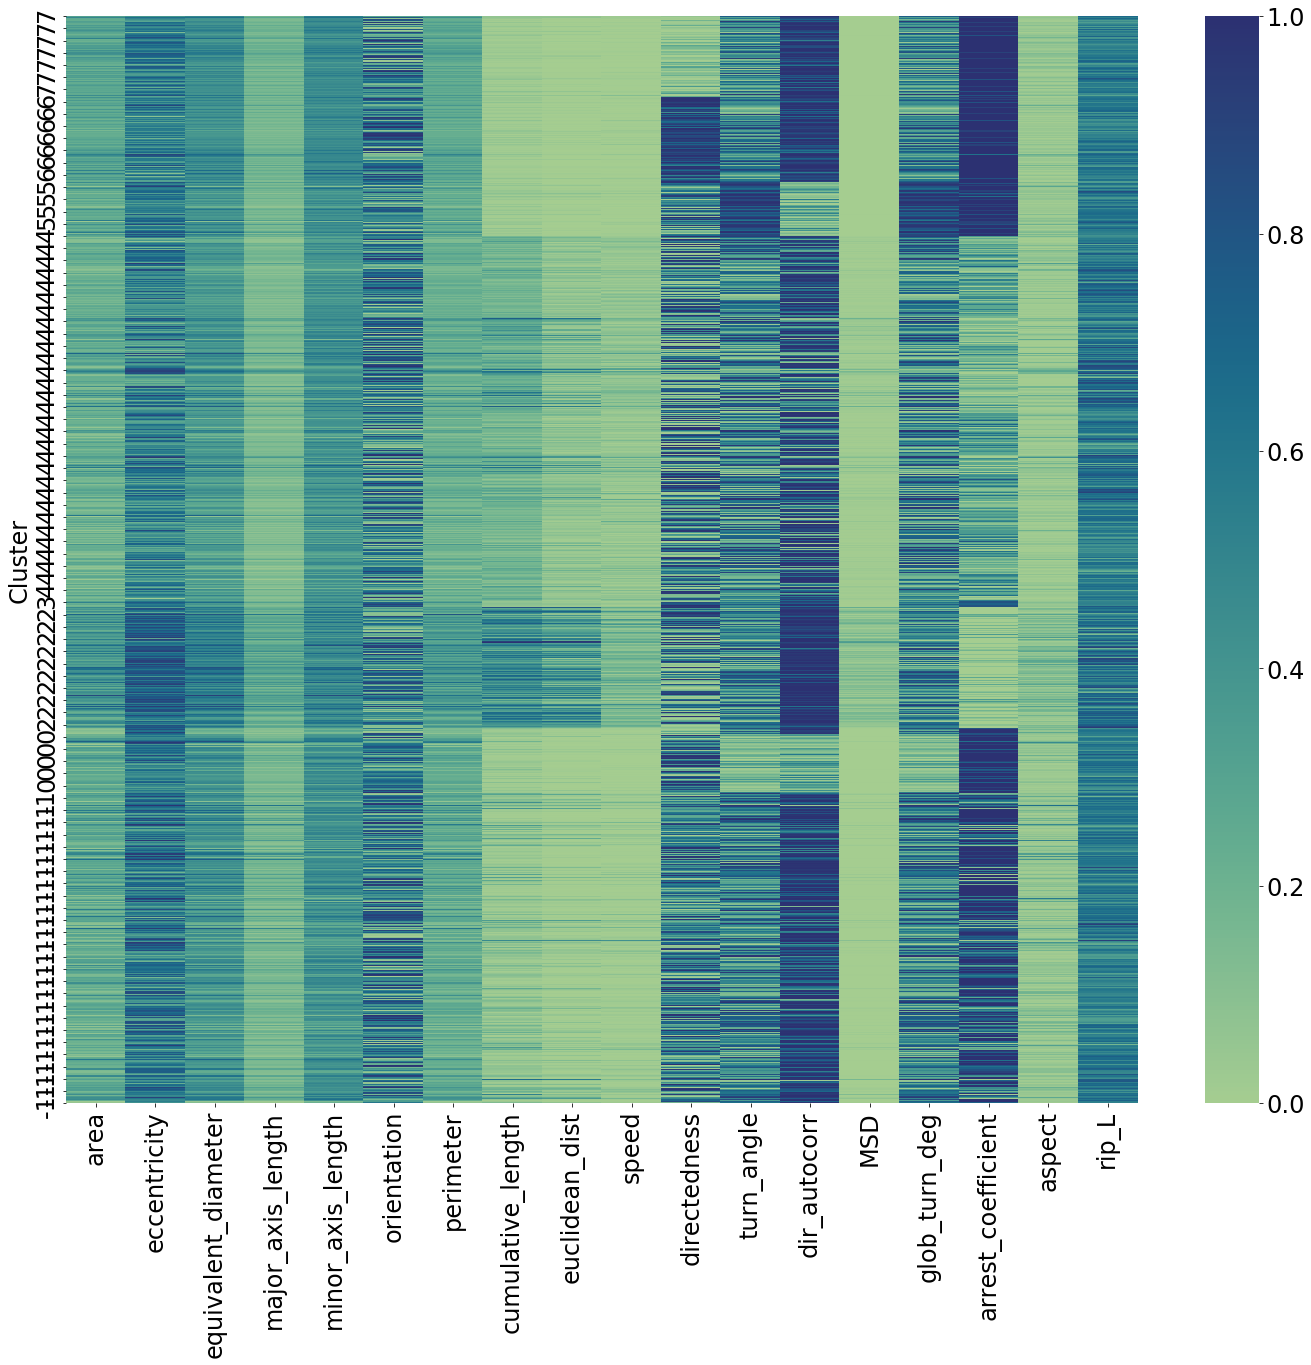

In [7]:
cp.clustering_heatmap(df_in=tptlabel_dr_df, dr_factors=DR_FACTORS)

### Which metrics contributed the most to each cluster?

In [8]:
cp.contribution_to_clusters(df_in=tptlabel_dr_df, threshold_value=0.001) #0.0001

label,-1,0,1,2,3,4,5,6,7
area,1.216476e-06,3.041205e-05,0.003417,0.002302,6.842702e-05,0.000206,0.000037,1.097873e-04,9.853486e-05
eccentricity,3.100109e-08,2.185536e-04,0.002304,0.003002,6.037930e-04,0.002495,0.000265,5.815811e-04,4.869217e-04
equivalent_diameter,9.900393e-06,6.501584e-05,0.005675,0.002653,5.796691e-05,0.000220,0.000075,1.820025e-04,1.662301e-04
perimeter,1.271372e-07,9.215386e-06,0.001716,0.001717,2.623204e-05,0.000184,0.000009,3.751223e-05,3.751223e-05
solidity,9.733572e-07,8.458818e-06,0.000140,0.000070,2.561861e-07,0.000025,0.000012,1.710402e-05,1.710402e-05
cumulative_length,2.651217e-04,9.355097e-04,0.000806,0.019501,4.589173e-05,0.001227,0.000897,1.001308e-03,9.630158e-04
speed,4.468019e-05,9.699999e-05,0.000079,0.002217,6.763081e-06,0.000103,0.000095,9.525788e-05,9.392269e-05
orientedness,3.725031e-05,2.912895e-07,0.003220,0.000019,1.105033e-04,0.000201,0.000065,1.762270e-04,9.155208e-05
directedness,1.937598e-05,1.413861e-04,0.022383,0.000108,2.635351e-02,0.000003,0.000122,2.434517e-02,2.730721e-02
endpoint_dir_ratio,2.278396e-04,6.372928e-04,0.001331,0.012144,9.392919e-04,0.000201,0.000609,6.979839e-04,7.347290e-04


Cluster -1 has the following main contributors: ['dir_autocorr', 'arrest_coefficient']
Cluster 0 has the following main contributors: ['dir_autocorr', 'arrest_coefficient']
Cluster 1 has the following main contributors: ['area', 'eccentricity', 'equivalent_diameter', 'perimeter', 'orientedness', 'directedness', 'endpoint_dir_ratio', 'dir_autocorr', 'arrest_coefficient']
Cluster 2 has the following main contributors: ['area', 'eccentricity', 'equivalent_diameter', 'perimeter', 'cumulative_length', 'speed', 'endpoint_dir_ratio', 'dir_autocorr', 'max_dist', 'arrest_coefficient']
Cluster 3 has the following main contributors: ['directedness', 'dir_autocorr']
Cluster 4 has the following main contributors: ['eccentricity', 'cumulative_length', 'arrest_coefficient']
Cluster 5 has the following main contributors: ['dir_autocorr', 'arrest_coefficient']
Cluster 6 has the following main contributors: ['cumulative_length', 'directedness', 'dir_autocorr', 'arrest_coefficient']
Cluster 7 has the fol

### Correlation (Pearsons) of metrics compared to one another

In [ ]:
cp.correlation_matrix_heatmap(df_in=tptlabel_dr_df)

In [ ]:
######################## FINISHED ##################################

# Make plots of single cells

In [10]:
tavg_exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_exemplar_df.csv')

In [11]:
# Make an exemplars DF that only contains 5 of each thing
n=3
tavg_exemplar_df = tavg_exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

Condition = Untreated. TAVG_Cluster ID = 0. Cell_df track length = 12 and ntpts from tavg_exemplar_df = 12.0
Processing  D:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped/Condition_Migrating\PBMCeNK_untreated_1__tracks.h5


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 11.82it/s]


Saving toD:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped_1-12-2023_OUTPUT/ThreeConditions_Go_Stopping_Stopped_1-12-2023\2023-01-12_11-14-19-240330\plots/Clustering/Cluster_Disambiguation_wholetrack/\Disambiguated_WHOLETRACK_Condition = Untreated. TAVG_Cluster ID = 0__disambiguated__R150_0


  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

Condition = Untreated. TAVG_Cluster ID = 0. Cell_df track length = 37 and ntpts from tavg_exemplar_df = 37.0
Processing  D:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped/Condition_Migrating\PBMCeNK_untreated_1__tracks.h5


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 18.79it/s]


Saving toD:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped_1-12-2023_OUTPUT/ThreeConditions_Go_Stopping_Stopped_1-12-2023\2023-01-12_11-14-19-240330\plots/Clustering/Cluster_Disambiguation_wholetrack/\Disambiguated_WHOLETRACK_Condition = Untreated. TAVG_Cluster ID = 0__disambiguated__R150_1


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

Condition = Untreated. TAVG_Cluster ID = 0. Cell_df track length = 14 and ntpts from tavg_exemplar_df = 14.0
Processing  D:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped/Condition_Migrating\PBMCeNK_untreated_1__tracks.h5


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 13.09it/s]


Saving toD:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped_1-12-2023_OUTPUT/ThreeConditions_Go_Stopping_Stopped_1-12-2023\2023-01-12_11-14-19-240330\plots/Clustering/Cluster_Disambiguation_wholetrack/\Disambiguated_WHOLETRACK_Condition = Untreated. TAVG_Cluster ID = 0__disambiguated__R150_2


  0%|                                                                                          | 0/169 [00:00<?, ?it/s]

Condition = CytoD 0.5 uM. TAVG_Cluster ID = 1. Cell_df track length = 169 and ntpts from tavg_exemplar_df = 169.0
Processing  D:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped/Condition_Slowing\PBMCeNK_CytoD_1_tracks.h5


100%|████████████████████████████████████████████████████████████████████████████████| 169/169 [00:07<00:00, 23.82it/s]


Saving toD:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped_1-12-2023_OUTPUT/ThreeConditions_Go_Stopping_Stopped_1-12-2023\2023-01-12_11-14-19-240330\plots/Clustering/Cluster_Disambiguation_wholetrack/\Disambiguated_WHOLETRACK_Condition = CytoD 0.5 uM. TAVG_Cluster ID = 1__disambiguated__R150_3


  0%|                                                                                           | 0/78 [00:00<?, ?it/s]

Condition = CytoD 0.5 uM. TAVG_Cluster ID = 1. Cell_df track length = 78 and ntpts from tavg_exemplar_df = 78.0
Processing  D:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped/Condition_Slowing\PBMCeNK_CytoD_1_tracks.h5


100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [00:03<00:00, 22.43it/s]


Saving toD:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped_1-12-2023_OUTPUT/ThreeConditions_Go_Stopping_Stopped_1-12-2023\2023-01-12_11-14-19-240330\plots/Clustering/Cluster_Disambiguation_wholetrack/\Disambiguated_WHOLETRACK_Condition = CytoD 0.5 uM. TAVG_Cluster ID = 1__disambiguated__R150_4


  0%|                                                                                           | 0/67 [00:00<?, ?it/s]

Condition = CytoD 2 uM. TAVG_Cluster ID = 1. Cell_df track length = 67 and ntpts from tavg_exemplar_df = 67.0
Processing  D:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped/Condition_Stopped\PBMCeNK_CytoD_2_tracks.h5


100%|██████████████████████████████████████████████████████████████████████████████████| 67/67 [00:03<00:00, 20.96it/s]


Saving toD:/Michael_Shannon/CELLPLATO_MASTER/OCTOBERTESTING_/ThreeConditions_Go_Stopping_Stopped_1-12-2023_OUTPUT/ThreeConditions_Go_Stopping_Stopped_1-12-2023\2023-01-12_11-14-19-240330\plots/Clustering/Cluster_Disambiguation_wholetrack/\Disambiguated_WHOLETRACK_Condition = CytoD 2 uM. TAVG_Cluster ID = 1__disambiguated__R150_5


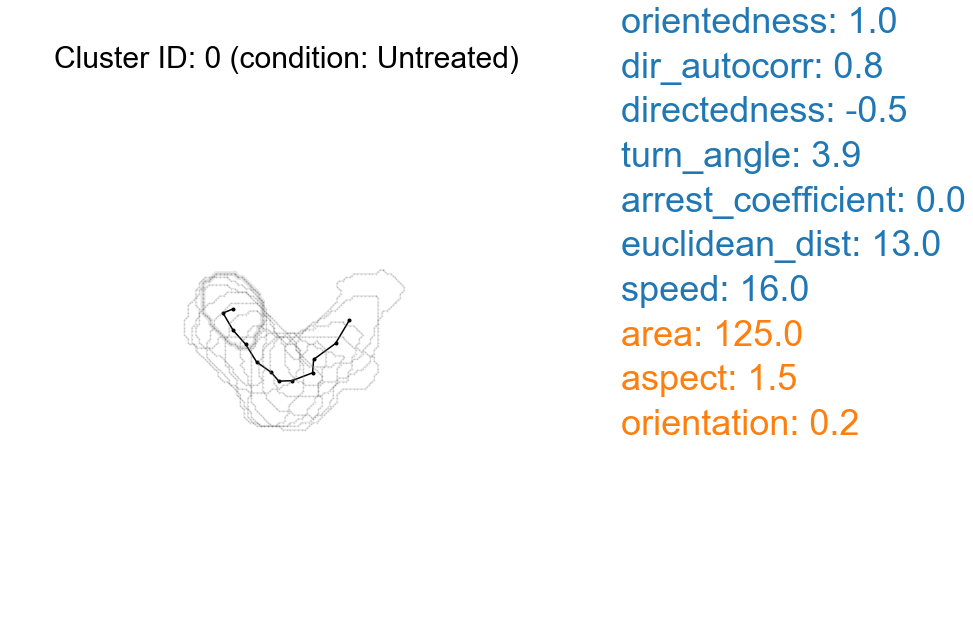

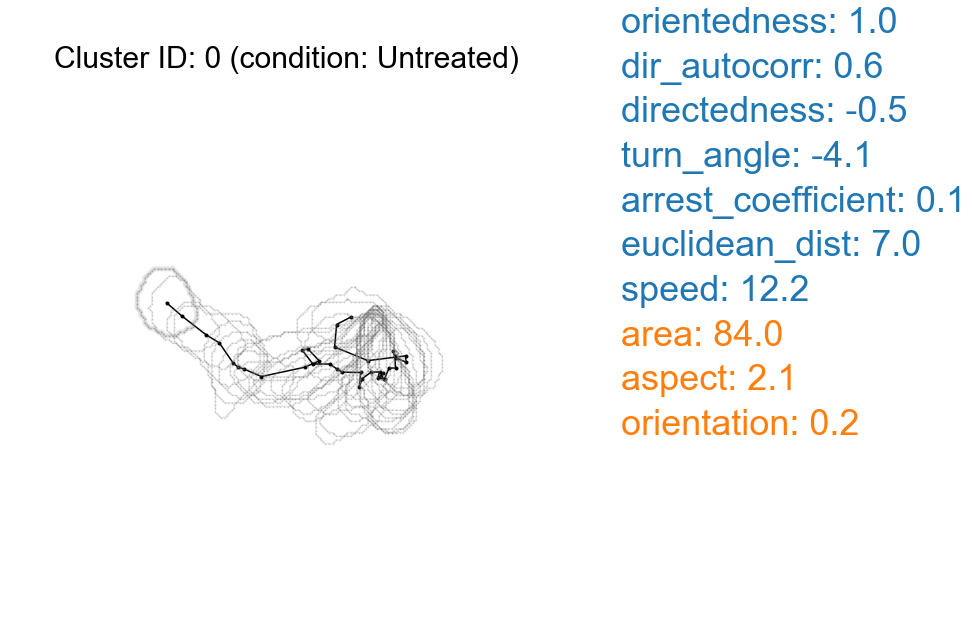

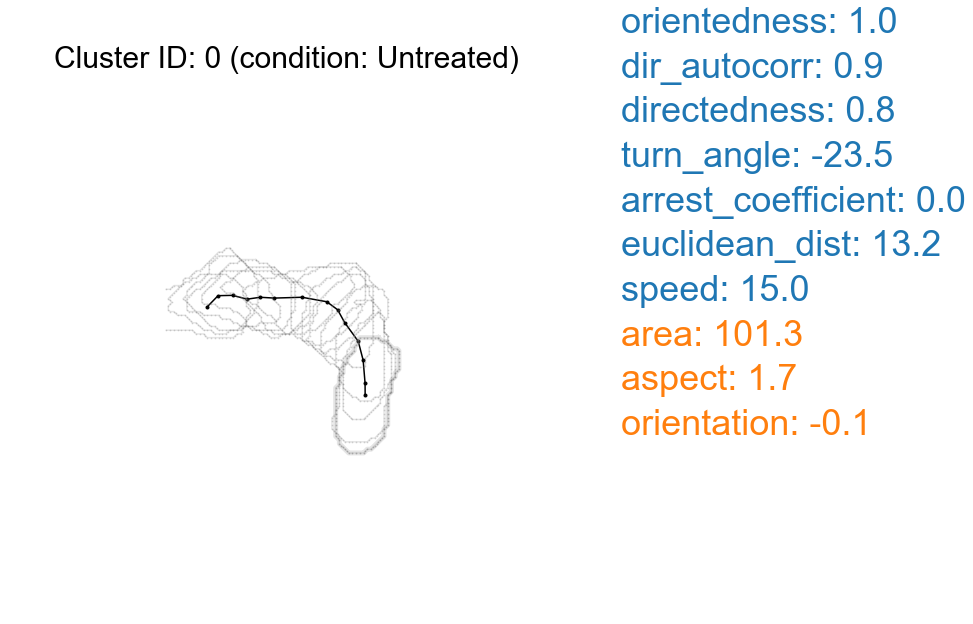

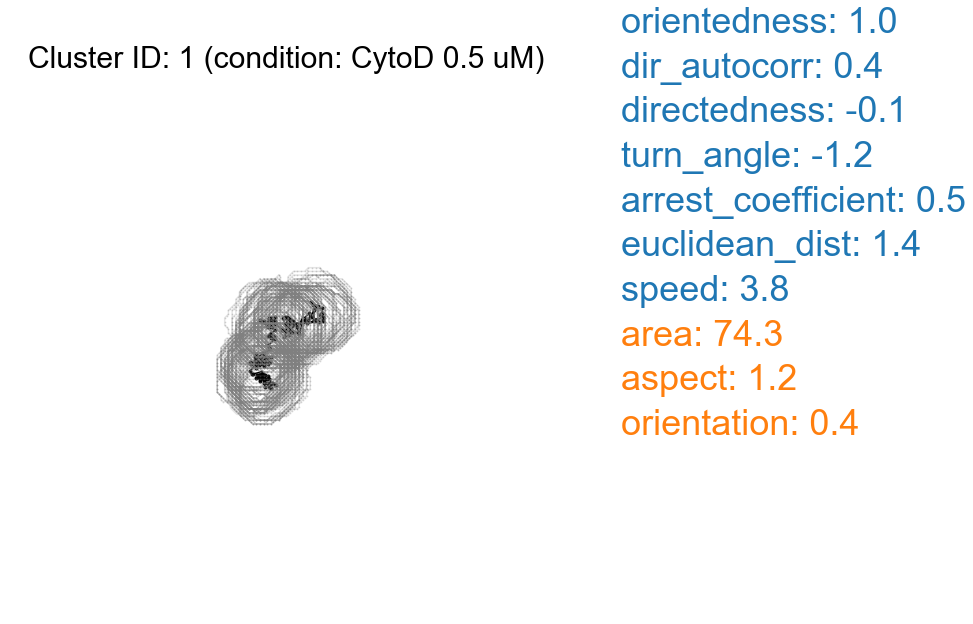

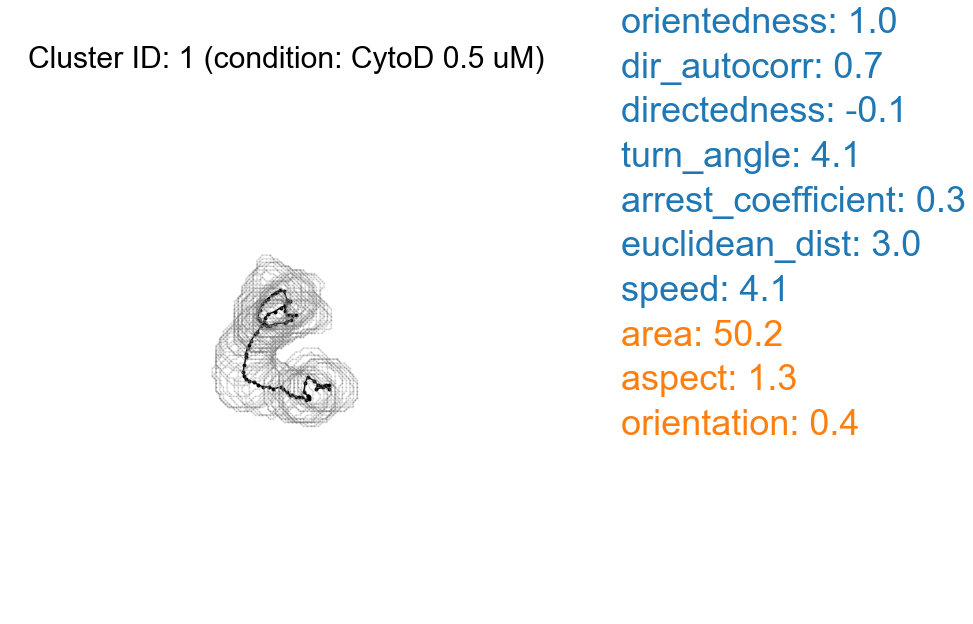

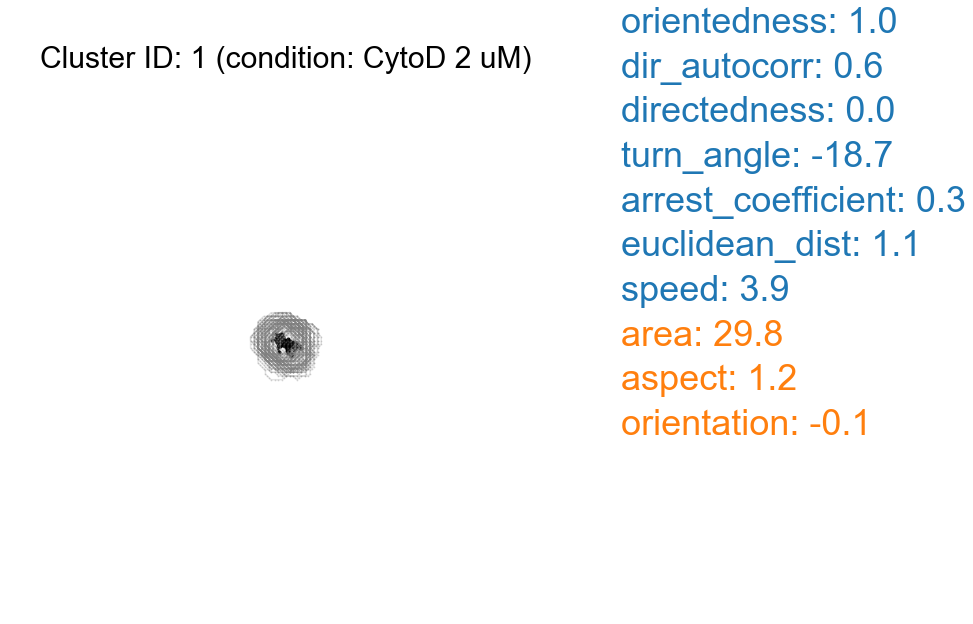

In [12]:
size=150

df= tptlabel_dr_df
exemp_df=tavg_exemplar_df

wholetrack_exemplar_df=cp.disambiguate_wholetrack(df, exemp_df, XYRange=size,boxoff=True)

In [ ]:
tavg_exemplar_df

In [ ]:
wholetrack_exemplar_df

In [ ]:
# # Make an exemplars DF that only contains 5 of each thing
# n=5
# exemplar_df = exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

MIG_DISPLAY_FACTORS =['cumulative_length',
           # 'euclidean_dist',
            'speed',
            'orientedness',
            'directedness',
            # 'turn_angle',
            'endpoint_dir_ratio',
            'dir_autocorr',
            'outreach_ratio',
            'MSD',
            'max_dist',
            # 'glob_turn_deg',
            'arrest_coefficient',
            'rip_L']

SHAPE_DISPLAY_FACTORS = ['area', #THESE ONES used 12-15-2022
            'eccentricity',
            'equivalent_diameter',
            'perimeter',
            'solidity',
            'aspect',
            'rip_L']

In [ ]:
new_DR_FACTORS = ['area', #THESE ONES used 12-15-2022

            # 'bbox_area',
            'eccentricity',
            'equivalent_diameter',
            # 'extent',
            # 'filled_area',
            # 'major_axis_length',
            # 'minor_axis_length',
            # 'orientation',
            'perimeter',
            'solidity',
            'cumulative_length',
           # 'euclidean_dist',
            'speed',
            'orientedness',
            'directedness',
            # 'turn_angle',
            'endpoint_dir_ratio',
            'dir_autocorr',
            'outreach_ratio',
            'MSD',
            'max_dist',
            # 'glob_turn_deg',
            'arrest_coefficient',
            'aspect',
            'rip_L']

In [3]:
# These repeats mean that large changes between the groups dominate, rather than small ones.
# The fine detail ones all look to be switching between clusters in the ting. Anyway, change the time window

new_DR_FACTORS = ['area',
            'bbox_area',
            'eccentricity',
            'equivalent_diameter',
            'extent', #thresholder
            'filled_area',
            'major_axis_length',
            'minor_axis_length',
            'orientation',
            'perimeter',
            'solidity', #thresholder
            'cumulative_length', #repeats 1
           'euclidean_dist', #repeats 1
            'speed', #repeats 1
            'orientedness', 
            'directedness', #Fine detail
            'turn_angle', #Fine detail
            'endpoint_dir_ratio',
            'dir_autocorr', #Fine detail
            'outreach_ratio',#thresholder
            'MSD', #repeats 1
            'max_dist', #repeats 1
            'glob_turn_deg', #fine detail
            'arrest_coefficient', #repeats 1 but with high vals instead of low
            'aspect',
            'rip_L']

DR_FACTORS = ['area',

            'bbox_area',
            'eccentricity',
            'equivalent_diameter',
            'extent',
            'filled_area',
            'major_axis_length',
            'minor_axis_length',
            'orientation',
            'perimeter',
            'solidity',
            'cumulative_length',
           'euclidean_dist',
            'speed',
            'orientedness',
            'directedness',
            'turn_angle',
            'endpoint_dir_ratio',
            'dir_autocorr',
            'outreach_ratio',
            'MSD',
            'max_dist',
            'glob_turn_deg',
            'arrest_coefficient',
            'aspect',
            'rip_L']

In [ ]:
new_DR_FACTORS = ['area', #THESE ONES used 12-15-2022

            # 'bbox_area',
            'eccentricity',
            'equivalent_diameter',
            # 'extent',
            # 'filled_area',
            # 'major_axis_length',
            # 'minor_axis_length',
            # 'orientation',
            'perimeter',
            'solidity',
            'cumulative_length',
           # 'euclidean_dist',
            'speed',
            'orientedness',
            'directedness',
            # 'turn_angle',
            'endpoint_dir_ratio',
            'dir_autocorr',
            'outreach_ratio',
            'MSD',
            'max_dist',
            # 'glob_turn_deg',
            'arrest_coefficient',
            'aspect',
            'rip_L']

In [ ]:
# # This is to do the above on normalized data in order to check for differences that way.

# df_in = dr_df

# CLUSTERON=new_DR_factors

# sub_set = df_in[CLUSTERON] # self.df #here, you don't do 'values' function. Therefore this is a df
# # X = sub_set.values
# Z = StandardScaler().fit_transform(sub_set)
# X = MinMaxScaler().fit_transform(Z)

# ##

# new_df=df_in.replace(to_replace=sub_set, value=X)

# scaled_subset_df=pd.DataFrame(data=X,columns=CLUSTERON)

# lab_dr_df = pd.concat([df_in,lab_df], axis=1)